## Laboratorio 4 - Cálculo Numérico
##### Antonio Cabrera Landín 3ºMAIS
---

Primero vamos a importar las liberias que vamos a utilizar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problema 1: Coeficientes indeterminados

Escribir una función llamada `coeficientes_lagrange` que, dados los nodos de interpolación $x$ y los valores correspondientes de la función $f(x)$ en cada nodo, construya los coeficientes del polinomio de Lagrange utilizando el método de coeficientes indeterminados.

La función debe tenre los siguientes argumentos:

- `x`: Nodos de interpolación.
- `fx`: Valores correspondientes de la función $f(x)$ en cada nodo.

La función debe devolver:

- Coeficientes del polinomio de Lagrange.

Para implementar la función, se puede utilizar las siguientes funciones de numpy:
- `np.vander`: Para construir la matriz de Vandermonde.
- `np.linalg.solve`: Para resolver el sistema lineal de ecuaciones.

Primero vamos a crear la función que nos piden

In [2]:
def coeficientes_lagrange(x:list[int], fx:list[int]) -> list[int]:

    matriz_vander = np.vander(x)

    coeficientes = np.linalg.solve(matriz_vander, fx)
    
    return coeficientes

Vamos a probarla con la función $sen(x)$ en los puntos $\{1,2,3,4,5\}$, para ello primero computamos los coeficientes del polinomio interpolador

In [3]:
x = [1,2,3,4,5]
f = lambda x: np.sin(x)
fx = [f(x_i) for x_i in x]

coeficientes = coeficientes_lagrange(x, fx)

Para evaluar el polinomio vamos a utilizar el método de horner que ya vimos en clase

In [7]:
def horner(poly, x):
    result = poly[0]

    n = len(poly)
 
    for i in range(1, n):
 
        result = result*x + poly[i]
 
    return result

In [5]:
a = np.pi/2
print(f"f({a})=sen({a})={horner(coeficientes, len(coeficientes), a)}")

f(1.5707963267948966)=sen(1.5707963267948966)=1.0195785884688382


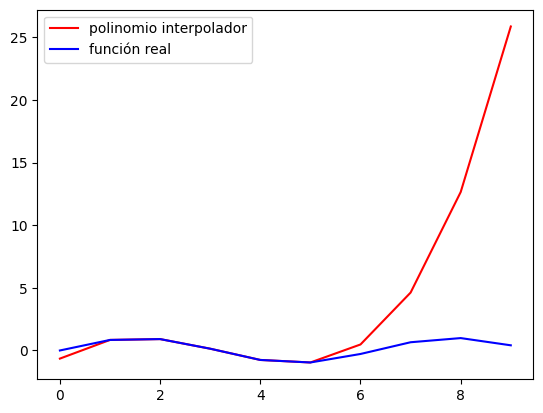

In [6]:
x_i = np.linspace(0, 9, 10)
plt.plot(x_i, horner(coeficientes, len(coeficientes), x_i), 'r', label="polinomio interpolador")
plt.plot(x_i, f(x_i), 'b', label="función real")
plt.legend()
plt.show()

### Problema 2: Evaluar el polinomio de Lagrange

Escribir una función llamada `evaluar_lagrange` que, dados los puntos $z$, los nodos de interpolación $x$ y los valores correspondientes de la función $f(x)$ en cada nodo, evalúe el polinomio de Lagrange en los puntos $z$ utilizando el método de coeficientes indeterminados.

La función debe tener los siguientes argumentos:

- `z`: Puntos en los que se evaluará el polinomio.
- `x`: Nodos de interpolación.
- `fx`: Valores correspondientes de la función $f(x)$ en cada nodo.

La función debe devolver:

- Valores del polinomio de Lagrange en los puntos $z$.

Para implementar la función, se debe utilizar la función `coeficientes_lagrange`del problema anterior para obtener los coeficientes del polinomio de Lagrange y, a continuación, evaluar el polinomio en los puntos $z$ de forma eficientes.

Como nos piden evaluar el polinomio en los puntos $z$ de forma eficiente, vamos a usar el **método de Horner**

In [7]:
def evaluar_lagrange(z:list[int], x:list[int], fx:list[int]) -> list[int]:
    coeficientes = coeficientes_lagrange(x, fx)
    valores = [horner(coeficientes, len(coeficientes), z_i) for z_i in z]

    return valores

In [8]:
x = [1,2,3,4,5]
f = lambda x: np.sin(x)
fx = [f(x_i) for x_i in x]

z = [2,3,4]

print(f"Lagrange: {evaluar_lagrange(z, x, fx)}")
print(f"Función real: {[f(z_i) for z_i in z]}")

Lagrange: [0.909297426825682, 0.14112000805986658, -0.7568024953079265]
Función real: [0.9092974268256817, 0.1411200080598672, -0.7568024953079282]


### Problema 3: Forma de Lagrange

1 - Escribir una función llamada `base_lagrange` que, dados los puntos $z$ y los nodos de interpolación $x$, calcule los valores de los elementos de la base de Lagrange en los puntos $z$.

La función debe tener los siguientes argumentos:

- `z`: Puntos en los que se evaluarán los elementos de la base de Lagrange.
- `x`: Nodos de interpolación

La función debe devolver:

- Base de lagrange evaluada en los puntos $z$.

Vamos a implementar la fórmula para calcular los elementos de la base de lagrange [[1]](http://www.webpages.ttu.edu/jengwer/notes/LagrangeBasis.pdf), y vamos a evaluar la base de lagrange en los puntos de $z$.

In [26]:
def base_lagrange(z:np.array, x:np.array) -> np.array:
    x = np.array(x)
    z = np.array(z)
    
    n = len(x)
    result = np.ones((n, len(z)))

    for j in range(n):
        for i in range(n):  
            if i != j:
                result[:, j] *= (z - x[i])/(x[j]-x[i])
    
    return result

In [27]:
x = np.array([1,2,3,4,5])
z = np.array([1,2,3,4,5])

print(base_lagrange(z, x))

[[ 1.  0. -0.  0. -0.]
 [-0.  1.  0. -0.  0.]
 [ 0. -0.  1.  0. -0.]
 [-0.  0. -0.  1.  0.]
 [ 0. -0.  0. -0.  1.]]


2 - Extender la función `evaluar_lagrange` del problema anterior para que acepte un argumento adicional `metodo`que especifique el método a utilizar para la evaluación: (`'indeterminados'` o `'lagrange'`). Por defecto el método debe ser `'indeterminados'`.

Si el método especificado es `'lagrange'`, la función debe utilizar la función `base_lagrange` para calcular los valores de los elementos de la base de Lagrange en los puntos $z$ y, a continuación, utilizar dichos valores para evaluar el polinomio de Lagrange en los puntos $z$.

In [28]:
def evaluar_lagrange(z:list[int], x:list[int], fx:list[int], metodo='indeterminado') -> list[int]:

    if metodo == 'indeterminado':
        coeficientes = coeficientes_lagrange(x, fx)
        valores = [horner(coeficientes, len(coeficientes), z_i) for z_i in z]
    elif metodo == 'lagrange':
        base = base_lagrange(z, x)
        print(base)
    else:
        raise ValueError('El método seleccionado no existe')

    return valores

3 - Utilizar la función `evaluar_lagrange`, para evaluar el polinomio de Lagrange de la función $f (x) = sin (x)$
en los puntos $z = 72$ utilizando los siguientes nodos (en grados)

`x = [70, 75]`

In [35]:
x_1 = [70, 75]
fx_1 = [np.sin(np.deg2rad(x_i)) for x_i in x_1]
z = np.deg2rad(72)

fz_1 = evaluar_lagrange([z], x_1, fx_1)

print(f'sen({z}) = {fz_1[-1]}')

sen(1.2566370614359172) = 0.5790208673967758


`x = [65, 70, 75]`

In [36]:
x_2 = [65, 70, 75]
fx_2 = [np.sin(np.deg2rad(x_i)) for x_i in x_2]
fz_2 = evaluar_lagrange([z], x_2, fx_2)
print(f'sen({z}) = {fz_2[-1]}')

sen(1.2566370614359172) = -0.14606366321613512


4. Dibuja la función $f (x) = sin (x)$ y los dos polinomios de Lagrange correspondientas a los nodos de interpolación del apartado anterior.

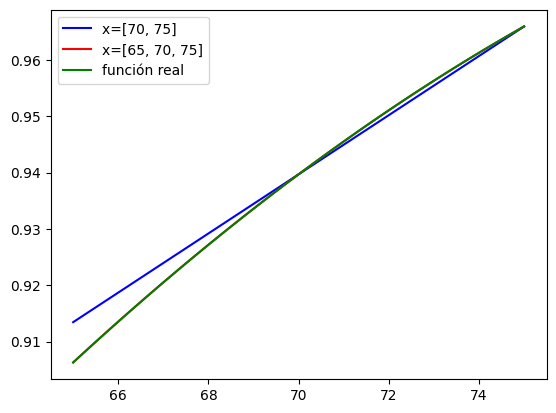

In [11]:
def evaluar_lagrange(x, xp, fp):
    polinomio = np.polyfit(xp, fp, len(xp) - 1)
    result = np.polyval(polinomio, x)

    return result

x_1 = [70, 75]
fx = fx_1 = [np.sin(np.deg2rad(x_i)) for x_i in x_1]
x_2 = [65, 70, 75]
fx_2 = [np.sin(np.deg2rad(x_i)) for x_i in x_2]

z = np.linspace(65, 75, 100)

plt.plot(z, evaluar_lagrange([z], x_1, fx_1)[-1], 'b', label="x=[70, 75]")
plt.plot(z, evaluar_lagrange([z], x_2, fx_2)[-1], 'r', label="x=[65, 70, 75]")
plt.plot(z, np.sin(np.deg2rad(z)), 'g', label="función real")
plt.legend()
plt.show()